In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv')
df.head(2)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


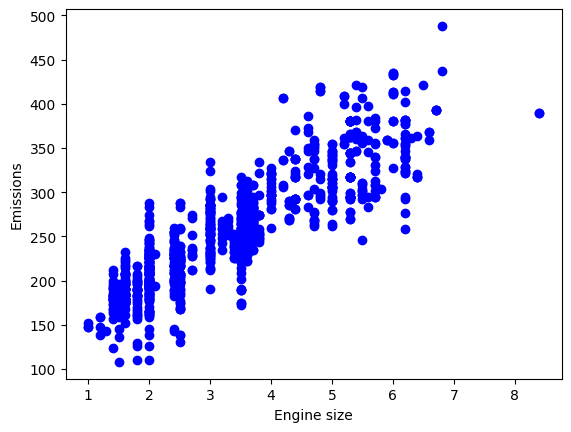

In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emissions')
plt.show()

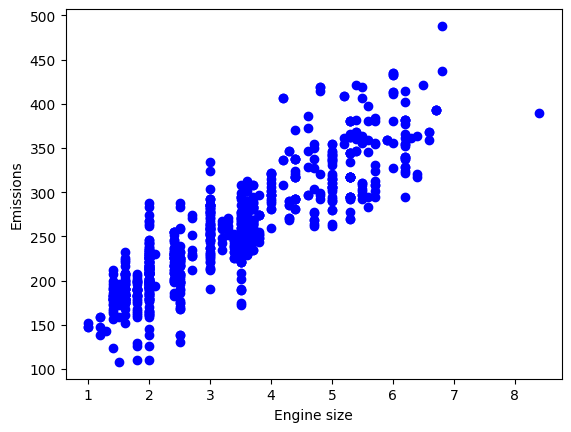

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test= cdf[~msk]

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emissions')
plt.show()

REGRESION LINEAL MULTIPLE

In [14]:
from sklearn.linear_model import LinearRegression

# Se crean los datos para entrenamiento
regm = LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

# Se ajusta el modelo con los datos de entrenamiento
regm.fit(x,y)
print('Coeficientes:', regm.coef_)

# Se predice con los datos de prueba 
yhat = regm.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

# Se obtienen los datos para evaluacion de los datos de prueba
X_t = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
Y_t = np.asanyarray(test[['CO2EMISSIONS']])
print('RSSE: %.2f' % np.mean((yhat - Y_t)**2))

print('Puntaje de varianza: %.2f' % regm.score(X_t,Y_t))

Coeficientes: [[11.85806076  6.82378935  9.61292829]]
RSSE: 598.60
Puntaje de varianza: 0.85


C:\Users\angel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [18]:
# EJEMPLO

from sklearn.linear_model import LinearRegression

df_ej = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]

mask = np.random.rand(len(df)) < .8
train_e = df_ej[mask]
test_e = df_ej[~mask]

multiple_model = LinearRegression()

xe = np.asanyarray(train_e[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
ye = np.asanyarray(train_e[['CO2EMISSIONS']])

multiple_model.fit(xe,ye)
print('Coeficientes:', multiple_model.coef_)
yhat_e = multiple_model.predict(test_e[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])

xe_t = np.asanyarray(test_e[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
ye_t = np.asanyarray(test_e[['CO2EMISSIONS']])

print('RSSE: %.2f' % np.mean(yhat_e - ye_t)**2)
print('Variance: %.2f' % multiple_model.score(xe_t,ye_t))

Coeficientes: [[9.89618105 6.74160676 7.3225837  2.72705062]]
RSSE: 5.88
Variance: 0.85


C:\Users\angel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
